## Polynomial Linear Regression

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [68]:
# Create a dataset with polynomial curve relationship
# Relationship: y = 2*x^2 - 3*x + 5 + noise

# Set random seed for reproducibility
np.random.seed(42)

# Create feature x with manually defined values for variety
# Values distributed across the range to show the polynomial curve
x_values = [
    -10, -9.5, -9, -8.5, -8, -7.5, -7, -6.5, -6, -5.5,
    -5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5,
    0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5,
    5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5,
    10, -9.8, -8.8, -7.8, -6.8, -5.8, -4.8, -3.8, -2.8, -1.8,
    -0.8, 0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2,
    9.2, -9.3, -8.3, -7.3, -6.3, -5.3, -4.3, -3.3, -2.3, -1.3,
    -0.3, 0.7, 1.7, 2.7, 3.7, 4.7, 5.7, 6.7, 7.7, 8.7,
    9.7, -9.1, -8.1, -7.1, -6.1, -5.1, -4.1, -3.1, -2.1, -1.1,
    -0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9
]

# Calculate y using polynomial relationship: y = 2*x^2 - 3*x + 5 + noise
noise = np.random.normal(0, 5, 100)  # Gaussian noise with std=5
y_values = [2*x**2 - 3*x + 5 + n for x, n in zip(x_values, noise)]

# Create DataFrame
data = {
    'x': x_values,
    'y': y_values
}

df = pd.DataFrame(data)

# Display first few rows and basic statistics
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head(10))
print("\nDataset statistics:")
print(df.describe())

Dataset shape: (100, 2)

First few rows:
      x           y
0 -10.0  237.483571
1  -9.5  213.308678
2  -9.0  197.238443
3  -8.5  182.615149
4  -8.0  155.829233
5  -7.5  138.829315
6  -7.0  131.896064
7  -6.5  112.837174
8  -6.0   92.652628
9  -5.5   84.712800

Dataset statistics:
                x           y
count  100.000000  100.000000
mean    -0.039000   71.353567
std      5.806334   63.243116
min    -10.000000   -2.123741
25%     -5.025000   15.162389
50%     -0.050000   56.084181
75%      4.925000  113.178293
max     10.000000  237.483571


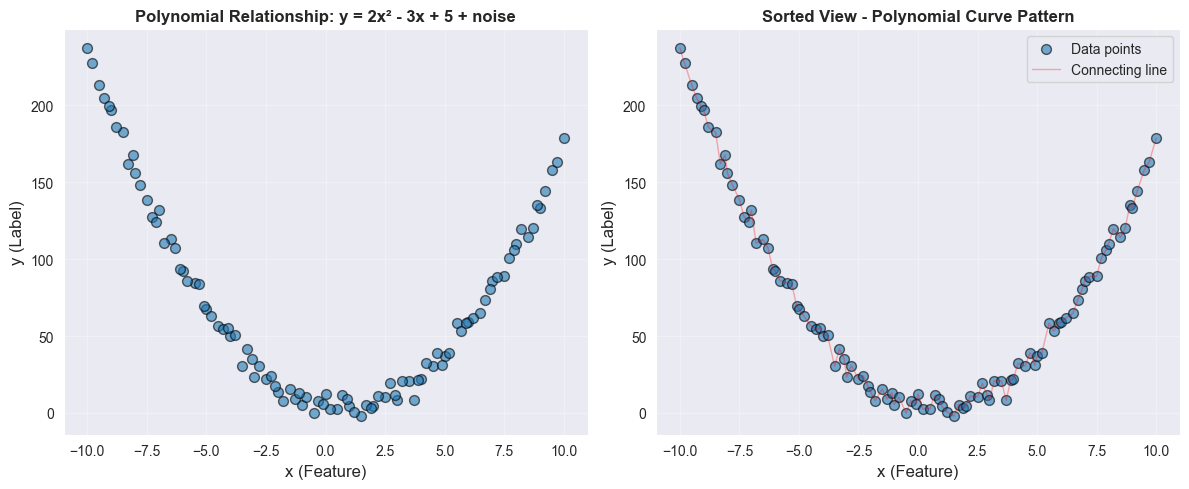

In [69]:
# Visualize the polynomial relationship
plt.figure(figsize=(12, 5))

# Plot 1: Scatter plot showing the polynomial curve
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], alpha=0.6, edgecolors='k', s=50)
plt.xlabel('x (Feature)', fontsize=12)
plt.ylabel('y (Label)', fontsize=12)
plt.title('Polynomial Relationship: y = 2x² - 3x + 5 + noise', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 2: Sorted plot to better show the curve
plt.subplot(1, 2, 2)
df_sorted = df.sort_values('x')
plt.scatter(df_sorted['x'], df_sorted['y'], alpha=0.6, edgecolors='k', s=50, label='Data points')
plt.plot(df_sorted['x'], df_sorted['y'], 'r-', alpha=0.3, linewidth=1, label='Connecting line')
plt.xlabel('x (Feature)', fontsize=12)
plt.ylabel('y (Label)', fontsize=12)
plt.title('Sorted View - Polynomial Curve Pattern', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [70]:
# feature and label separation

X = df[['x']]
y = df['y']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (100, 1)
y shape: (100,)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
# normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [73]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [74]:
coeff = model.coef_
intercept = model.intercept_

print(f'Coefficient: {coeff}')
print(f'Intercept: {intercept}')

Coefficient: [-17.77517075]
Intercept: 71.85178227212305


In [75]:
# predictions
y_pred = model.predict(X_test_scaled)

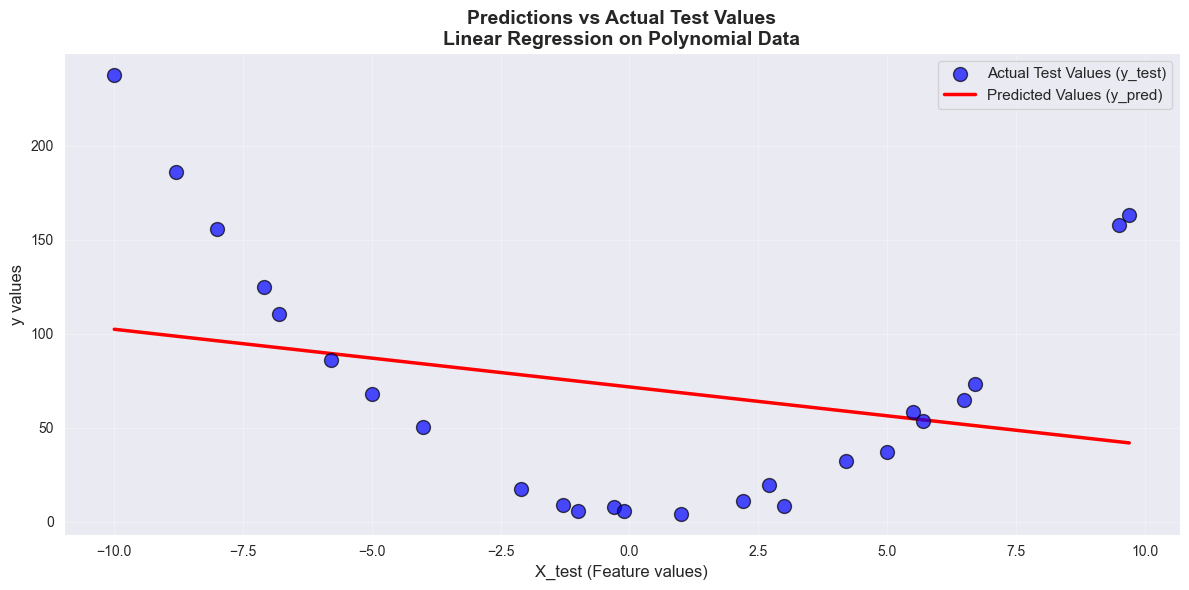

In [76]:
# Plot X_test vs y_test and y_pred on the same grid
plt.figure(figsize=(12, 6))

# Create a sorted version for smooth line plotting
X_test_flat = X_test.values.flatten()
sort_idx = np.argsort(X_test_flat)
X_test_sorted = X_test_flat[sort_idx]
y_pred_sorted = y_pred[sort_idx]

# Plot actual test values as scatter points
plt.scatter(X_test_flat, y_test, alpha=0.7, s=100, edgecolors='k', 
            label='Actual Test Values (y_test)', color='blue', zorder=3)

# Plot predictions as a line
plt.plot(X_test_sorted, y_pred_sorted, 'r-', linewidth=2.5, 
         label='Predicted Values (y_pred)', zorder=2)

# Labels and title
plt.xlabel('X_test (Feature values)', fontsize=12)
plt.ylabel('y values', fontsize=12)
plt.title('Predictions vs Actual Test Values\nLinear Regression on Polynomial Data', 
          fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3, zorder=1)

plt.tight_layout()
plt.show()

# Note: Linear regression may not fit well on polynomial data
# Consider using PolynomialFeatures for better results!

In [77]:
# Apply Polynomial Features with degree 2 and include_bias=True
poly = PolynomialFeatures(degree=3, include_bias=True)

# Transform training and test data
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f'Original X_train shape: {X_train_scaled.shape}')
print(f'Polynomial X_train shape: {X_train_poly.shape}')
print(f'\nOriginal X_test shape: {X_test_scaled.shape}')
print(f'Polynomial X_test shape: {X_test_poly.shape}')
print(f'\nPolynomial feature names: {poly.get_feature_names_out()}')

Original X_train shape: (75, 1)
Polynomial X_train shape: (75, 4)

Original X_test shape: (25, 1)
Polynomial X_test shape: (25, 4)

Polynomial feature names: ['1' 'x0' 'x0^2' 'x0^3']


In [78]:
# Train polynomial regression model
model_poly = LinearRegression(n_jobs=-1)
model_poly.fit(X_train_poly, y_train)

# Get polynomial coefficients
coeff_poly = model_poly.coef_
intercept_poly = model_poly.intercept_

print('Polynomial Regression Model (degree=2):')
print(f'Coefficients: {coeff_poly}')
print(f'Intercept: {intercept_poly}')
print(f'\nModel trained successfully!')

Polynomial Regression Model (degree=2):
Coefficients: [ 0.00000000e+00 -1.98685902e+01  6.74083931e+01 -4.62785568e-02]
Intercept: 4.4448828182296864

Model trained successfully!


In [79]:
# Make predictions using polynomial model
y_pred_poly = model_poly.predict(X_test_poly)

print('Polynomial Regression Predictions:')
print(f'y_pred_poly shape: {y_pred_poly.shape}')
print(f'\nFirst 10 predictions:')
print(y_pred_poly[:10])

Polynomial Regression Predictions:
y_pred_poly shape: (25,)

First 10 predictions:
[127.81756225   7.00671805   5.33677335  90.02711698 118.49307964
 155.29483276   3.07475413 162.36091199  70.15095868 236.63518582]


In [80]:
# Compare Linear vs Polynomial Regression Performance
print('='*60)
print('MODEL PERFORMANCE COMPARISON')
print('='*60)

# Linear Regression Metrics
mse_linear = mean_squared_error(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print('\nLinear Regression (degree=1):')
print(f'  MSE: {mse_linear:.4f}')
print(f'  MAE: {mae_linear:.4f}')
print(f'  R² Score: {r2_linear:.4f}')

# Polynomial Regression Metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print('\nPolynomial Regression (degree=2):')
print(f'  MSE: {mse_poly:.4f}')
print(f'  MAE: {mae_poly:.4f}')
print(f'  R² Score: {r2_poly:.4f}')

# Improvement
print('\n' + '='*60)
print('IMPROVEMENT:')
print('='*60)
print(f'MSE Reduction: {((mse_linear - mse_poly) / mse_linear * 100):.2f}%')
print(f'MAE Reduction: {((mae_linear - mae_poly) / mae_linear * 100):.2f}%')
print(f'R² Improvement: {((r2_poly - r2_linear) / (1 - r2_linear) * 100):.2f}%')

MODEL PERFORMANCE COMPARISON

Linear Regression (degree=1):
  MSE: 3812.5446
  MAE: 50.1015
  R² Score: 0.1025

Polynomial Regression (degree=2):
  MSE: 17.5618
  MAE: 3.2999
  R² Score: 0.9959

IMPROVEMENT:
MSE Reduction: 99.54%
MAE Reduction: 93.41%
R² Improvement: 99.54%


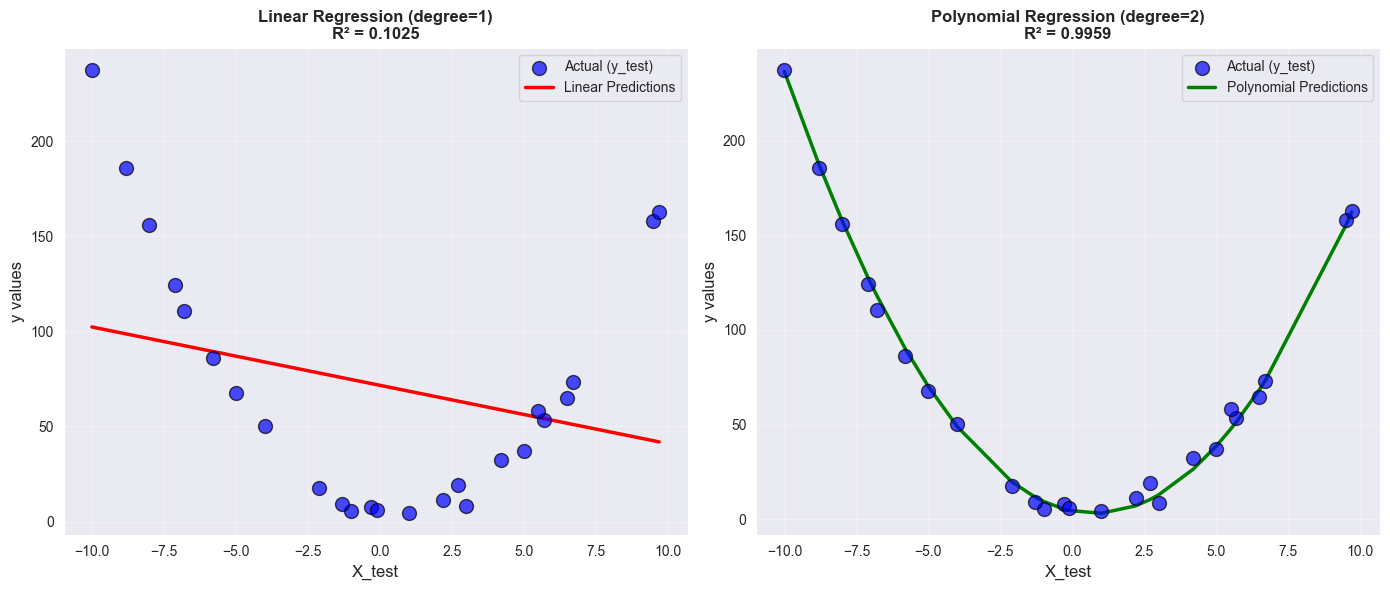

In [81]:
# Plot comparison: Linear vs Polynomial Regression
plt.figure(figsize=(14, 6))

# Sort data for smooth line plotting
X_test_flat = X_test.values.flatten()
sort_idx = np.argsort(X_test_flat)
X_test_sorted = X_test_flat[sort_idx]
y_pred_sorted = y_pred[sort_idx]
y_pred_poly_sorted = y_pred_poly[sort_idx]
y_test_sorted = y_test.values[sort_idx]

# Plot 1: Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test_flat, y_test, alpha=0.7, s=100, edgecolors='k', 
            label='Actual (y_test)', color='blue', zorder=3)
plt.plot(X_test_sorted, y_pred_sorted, 'r-', linewidth=2.5, 
         label='Linear Predictions', zorder=2)
plt.xlabel('X_test', fontsize=12)
plt.ylabel('y values', fontsize=12)
plt.title(f'Linear Regression (degree=1)\nR² = {r2_linear:.4f}', 
          fontsize=12, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Plot 2: Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(X_test_flat, y_test, alpha=0.7, s=100, edgecolors='k', 
            label='Actual (y_test)', color='blue', zorder=3)
plt.plot(X_test_sorted, y_pred_poly_sorted, 'g-', linewidth=2.5, 
         label='Polynomial Predictions', zorder=2)
plt.xlabel('X_test', fontsize=12)
plt.ylabel('y values', fontsize=12)
plt.title(f'Polynomial Regression (degree=2)\nR² = {r2_poly:.4f}', 
          fontsize=12, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()